In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Average Toxicity Scores over Year Months

In [31]:
df = pd.read_csv('../data/combined_data_scores.csv')

In [32]:
monthly_agg = df.groupby('yearmonth').agg({
    'hatebert_toxicity_score': ['mean', 'std', 'count'],
    'hateXplain_toxicity_score': ['mean', 'std'],
    'toxicbert_toxicity_score': ['mean', 'std'],
    'average_toxicity_score': ['mean', 'std']
}).reset_index()

In [33]:
# Flatten column names
monthly_agg.columns = ['_'.join(col).strip('_') for col in monthly_agg.columns.values]

In [34]:
# Rename columns for clarity
monthly_agg = monthly_agg.rename(columns={
    'hatebert_toxicity_score_count': 'post_count'
})

In [35]:
# Display the results
print("\nPreprocessed dataset shape:", monthly_agg.shape)
print("\nColumns in preprocessed data:", monthly_agg.columns.tolist())
monthly_agg.head()


Preprocessed dataset shape: (46, 10)

Columns in preprocessed data: ['yearmonth', 'hatebert_toxicity_score_mean', 'hatebert_toxicity_score_std', 'post_count', 'hateXplain_toxicity_score_mean', 'hateXplain_toxicity_score_std', 'toxicbert_toxicity_score_mean', 'toxicbert_toxicity_score_std', 'average_toxicity_score_mean', 'average_toxicity_score_std']


,yearmonth,hatebert_toxicity_score_mean,hatebert_toxicity_score_std,post_count,hateXplain_toxicity_score_mean,hateXplain_toxicity_score_std,toxicbert_toxicity_score_mean,toxicbert_toxicity_score_std,average_toxicity_score_mean,average_toxicity_score_std
0,2020-01,0.064483,0.099303,74240,0.067799,0.100363,0.042783,0.033425,0.058355,0.052193
1,2020-02,0.063876,0.097027,83617,0.066380,0.097516,0.044662,0.033611,0.058306,0.051102
2,2020-03,0.064724,0.098804,94863,0.066061,0.096543,0.045630,0.033612,0.058805,0.050800
3,2020-04,0.066814,0.100887,121318,0.064658,0.095361,0.045772,0.033727,0.059081,0.051018
4,2020-05,0.065622,0.098629,99602,0.065117,0.096247,0.046404,0.033676,0.059048,0.050602


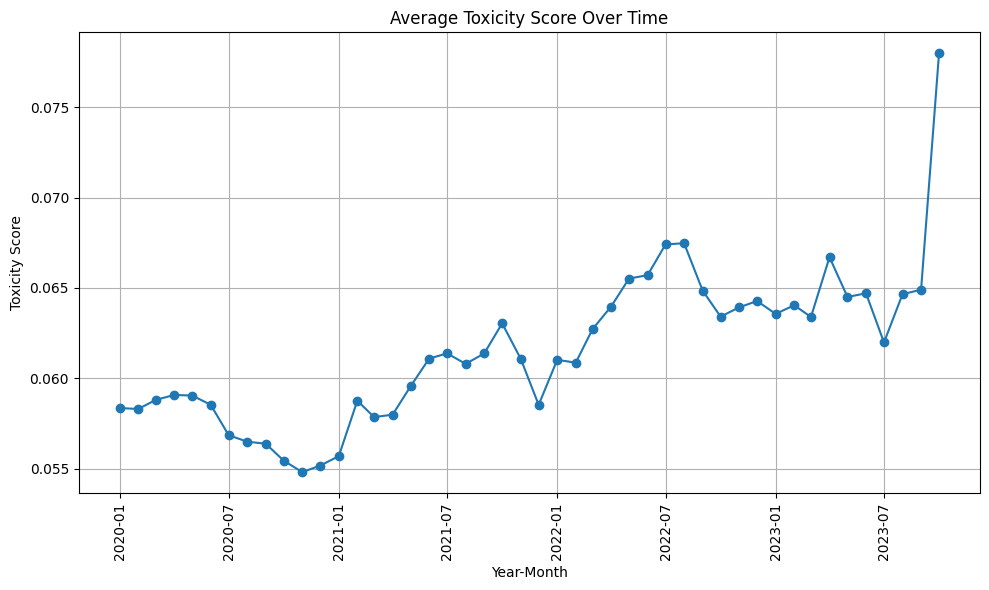

In [ ]:
# Plotting
plt.figure(figsize=(10,6))
plt.plot(np.array(monthly_agg['yearmonth']), np.array(monthly_agg['average_toxicity_score_mean']), marker='o', linestyle='-')
plt.title('Average Toxicity Score Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Toxicity Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Sort by highest average toxicity score
monthly_agg = monthly_agg.sort_values(by='average_toxicity_score_mean', ascending=False)
# View top 10 yearmonth with highest toxicity score
monthly_agg.head(10)

In [ ]:
# Basic statistics of the preprocessed data
monthly_agg.describe()

In [ ]:
monthly_agg.to_csv('../data/monthly_scores_summary.csv', index=False)

# Toxicity Score by Topics/Title

In [ ]:
# Load topic modelling results
topics_2020 = pd.read_csv('../data/topics_2020.csv')
topics_2021 = pd.read_csv('../data/topics_2021.csv')
topics_2022 = pd.read_csv('../data/topics_2022.csv')
topics_2023 = pd.read_csv('../data/topics_2023.csv')

### Top 10 year months with the highest toxicity score

In [ ]:
# Filter out outlier topic & sort by average toxicity score in descending order
may_2022 = topics_2022[(topics_2022['yearmonth'] == '2022-05') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
jun_2022 = topics_2022[(topics_2022['yearmonth'] == '2022-06') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
jul_2022 = topics_2022[(topics_2022['yearmonth'] == '2022-07') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
aug_2022 = topics_2022[(topics_2022['yearmonth'] == '2022-08') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
sep_2022 = topics_2022[(topics_2022['yearmonth'] == '2022-09') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
apr_2023 = topics_2023[(topics_2023['yearmonth'] == '2023-04') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
jun_2023 = topics_2023[(topics_2023['yearmonth'] == '2023-06') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
aug_2023 = topics_2023[(topics_2023['yearmonth'] == '2023-08') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
sep_2023 = topics_2023[(topics_2023['yearmonth'] == '2023-09') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
oct_2023 = topics_2023[(topics_2023['yearmonth'] == '2023-10') & (topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)

In [ ]:
# Concatenate top 10 year months with highest toxicity score
top_10 = pd.concat([may_2022, jun_2022, jul_2022, aug_2022, sep_2022, apr_2023, jun_2023, aug_2023, sep_2023, oct_2023], ignore_index=True)
# Sort by average toxicity score in descending order
top_10 = top_10.sort_values(by='average_toxicity_score', ascending=False)

In [ ]:
# Group by 'Title' and calculate the mean toxicity score
title_toxicity = top_10.groupby('title').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order
title_toxicity = title_toxicity.sort_values(by='average_toxicity_score', ascending=False)
title_toxicity.head()

,title,average_toxicity_score,Count
6221,if lawrence wong get asked these questions would,0.598739,1
1647,be wary of foreign chinese usually prcs sometimes,0.586507,1
8635,more migrant workers and maids in spore falling,0.580804,1
1695,bertha hensons commentary on the recent catholic,0.579510,1
6237,if singapore had umno it would be more developed,0.571414,1


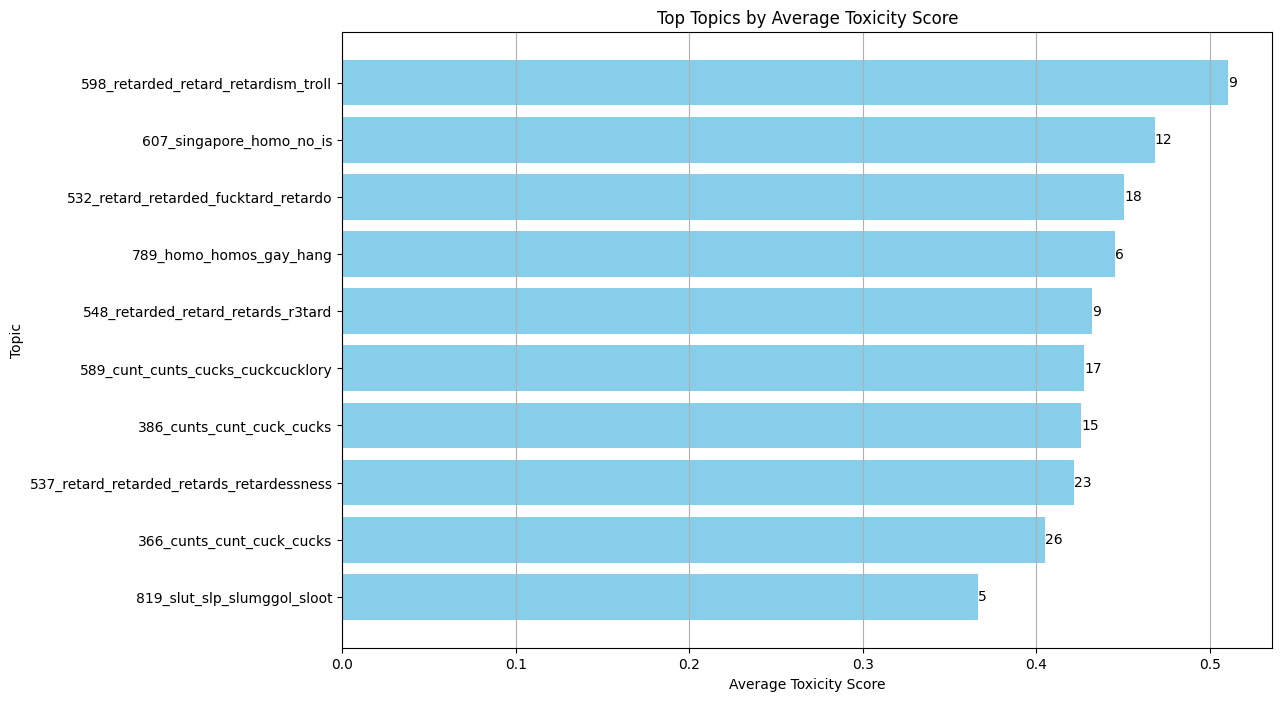

In [ ]:
# Group by 'Topic' and calculate the mean toxicity score
topic_toxicity = top_10.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order and select the top topics
top_topics = topic_toxicity.sort_values(by='average_toxicity_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_topics['Name'], top_topics['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(top_topics['average_toxicity_score']):
    plt.text(value, index, str(top_topics['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

#### October 2023

In [ ]:
# Group by 'Title' and calculate the mean toxicity score
title_toxicity_oct_2023 = oct_2023.groupby('title').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order
title_toxicity_oct_2023 = title_toxicity_oct_2023.sort_values(by='average_toxicity_score', ascending=False)

,title,average_toxicity_score,Count
137,cap geylang bazaar rental at 15k helps u,0.429240,1
536,malware scam,0.426402,1
143,caught a few prawns after few decadesu believe,0.426355,1
928,two cats rescued from cage after being abandoned,0.392062,1
236,even singaporeans dont know the gems we have,0.376859,1


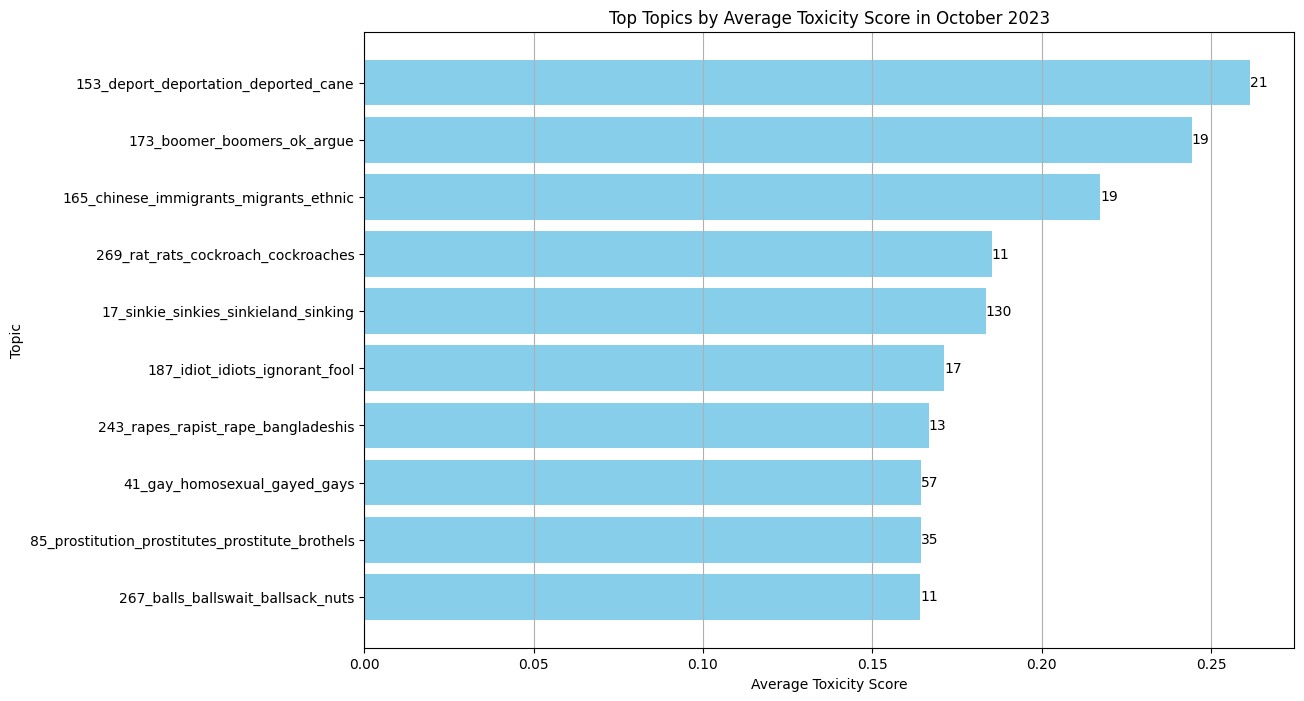

In [ ]:
# Group by 'Topic' and calculate the mean toxicity score
topic_toxicity_oct_2023 = oct_2023.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order and select the top topics
top_topics_oct_2023 = topic_toxicity_oct_2023.sort_values(by='average_toxicity_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_topics_oct_2023['Name'], top_topics_oct_2023['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score in October 2023')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(top_topics_oct_2023['average_toxicity_score']):
    plt.text(value, index, str(top_topics_oct_2023['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

#### August 2022

In [ ]:
# Group by 'Title' and calculate the mean toxicity score
title_toxicity_aug_2022 = aug_2022.groupby('title').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order
title_toxicity_aug_2022 = title_toxicity_aug_2022.sort_values(by='average_toxicity_score', ascending=False)

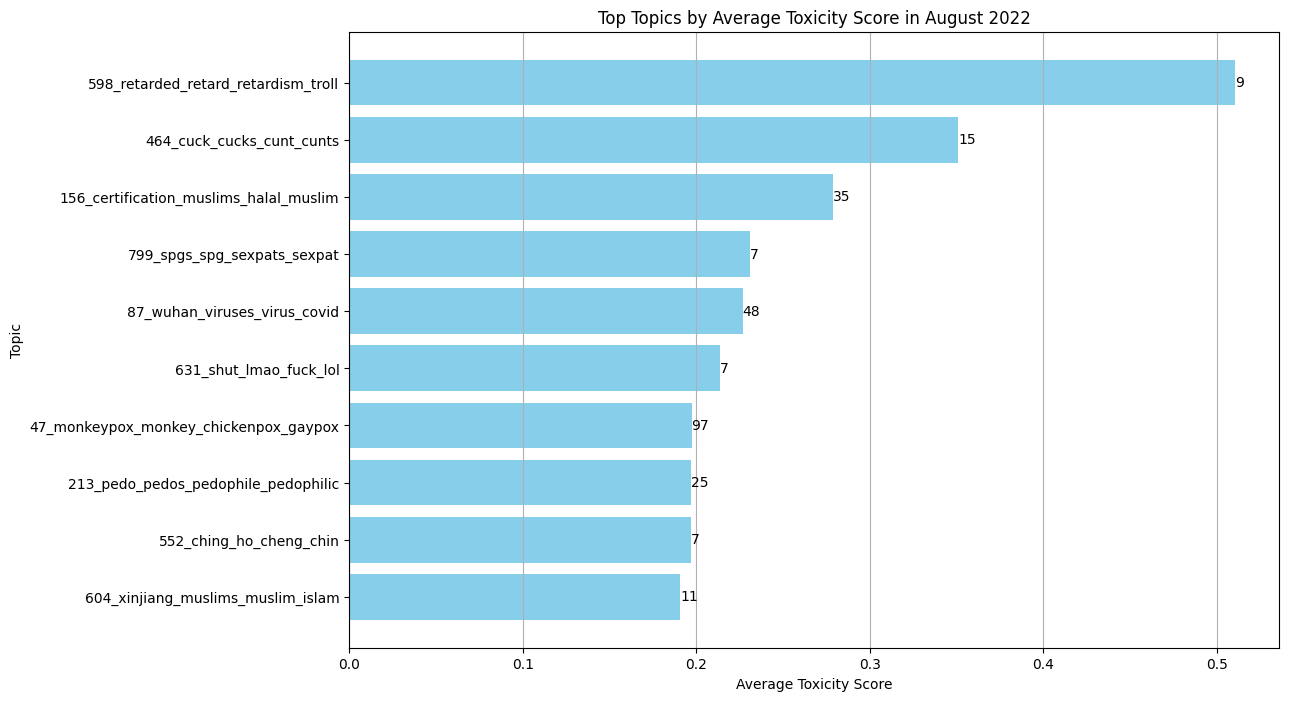

In [ ]:
# Group by 'Topic' and calculate the mean toxicity score
topic_toxicity_aug_2022 = aug_2022.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order and select the top topics
topic_toxicity_aug_2022 = topic_toxicity_aug_2022.sort_values(by='average_toxicity_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(topic_toxicity_aug_2022['Name'], topic_toxicity_aug_2022['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score in August 2022')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(topic_toxicity_aug_2022['average_toxicity_score']):
    plt.text(value, index, str(topic_toxicity_aug_2022['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

#### July 2022

In [ ]:
# Group by 'Title' and calculate the mean toxicity score
title_toxicity_jul_2022 = jul_2022.groupby('title').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order
title_toxicity_jul_2022 = title_toxicity_jul_2022.sort_values(by='average_toxicity_score', ascending=False)

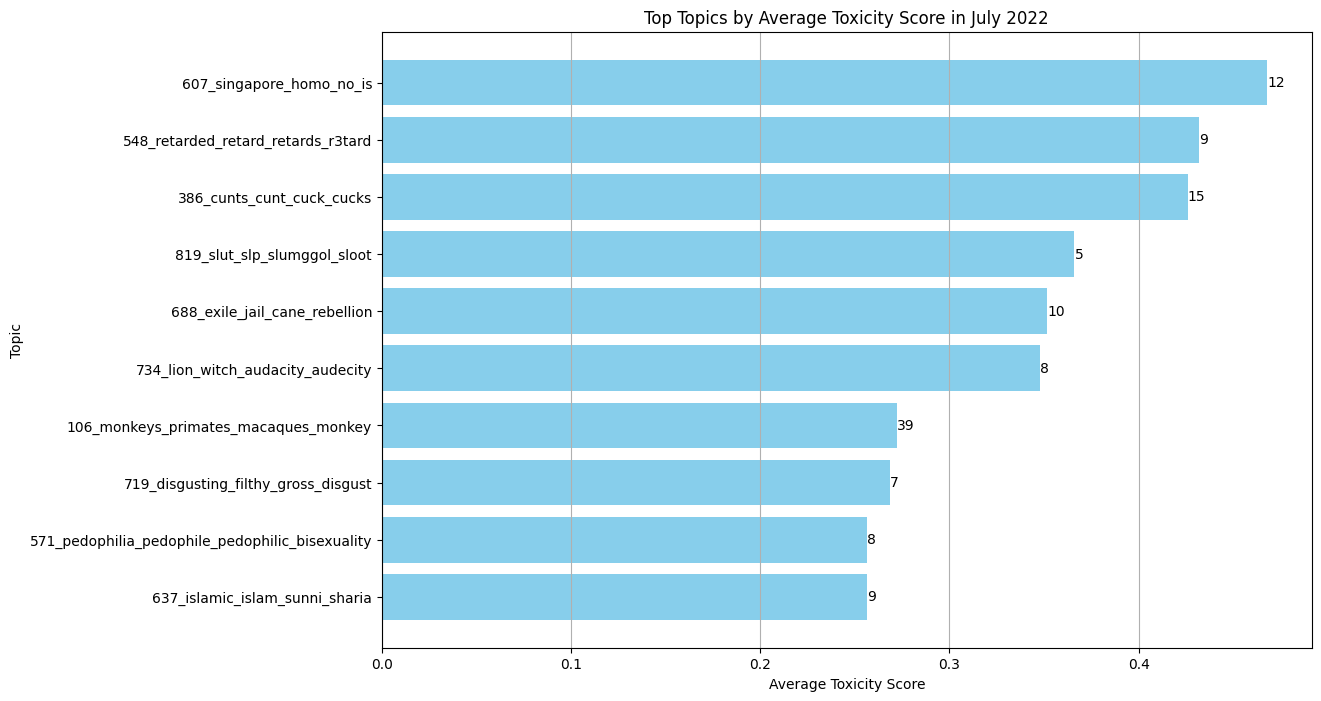

In [ ]:
# Group by 'Topic' and calculate the mean toxicity score
topic_toxicity_jul_2022 = jul_2022.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order and select the top topics
topic_toxicity_jul_2022 = topic_toxicity_jul_2022.sort_values(by='average_toxicity_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(topic_toxicity_jul_2022['Name'], topic_toxicity_jul_2022['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score in July 2022')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(topic_toxicity_jul_2022['average_toxicity_score']):
    plt.text(value, index, str(topic_toxicity_jul_2022['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

### Topics with highest toxicity score by year

In [ ]:
# Filter out outlier topic & sort by average toxicity score in descending order
topics_2020 = topics_2020[(topics_2020['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
topics_2021 = topics_2021[(topics_2021['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
topics_2022 = topics_2022[(topics_2022['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)
topics_2023 = topics_2023[(topics_2023['Topic'] != -1)].sort_values(by='average_toxicity_score', ascending=False)

In [ ]:
# Group by 'Title' and calculate the mean toxicity score
title_toxicity_2020 = topics_2020.groupby('title').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()
title_toxicity_2021 = topics_2021.groupby('title').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()
title_toxicity_2022 = topics_2022.groupby('title').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()
title_toxicity_2023 = topics_2023.groupby('title').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order
title_toxicity_2020 = title_toxicity_2020.sort_values(by='average_toxicity_score', ascending=False)
title_toxicity_2021 = title_toxicity_2021.sort_values(by='average_toxicity_score', ascending=False)
title_toxicity_2022 = title_toxicity_2022.sort_values(by='average_toxicity_score', ascending=False)
title_toxicity_2023 = title_toxicity_2023.sort_values(by='average_toxicity_score', ascending=False)

In [ ]:
# Group by 'Topic' and calculate the mean toxicity score
topic_toxicity_2020 = topics_2020.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()
topic_toxicity_2021 = topics_2021.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()
topic_toxicity_2022 = topics_2022.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()
topic_toxicity_2023 = topics_2023.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'size'}).reset_index()

# Sort by average toxicity score in descending order and select the top topics
top_topics_2020 = topic_toxicity_2020.sort_values(by='average_toxicity_score', ascending=False).head(10)
top_topics_2021 = topic_toxicity_2021.sort_values(by='average_toxicity_score', ascending=False).head(10)
top_topics_2022 = topic_toxicity_2022.sort_values(by='average_toxicity_score', ascending=False).head(10)
top_topics_2023 = topic_toxicity_2023.sort_values(by='average_toxicity_score', ascending=False).head(10)

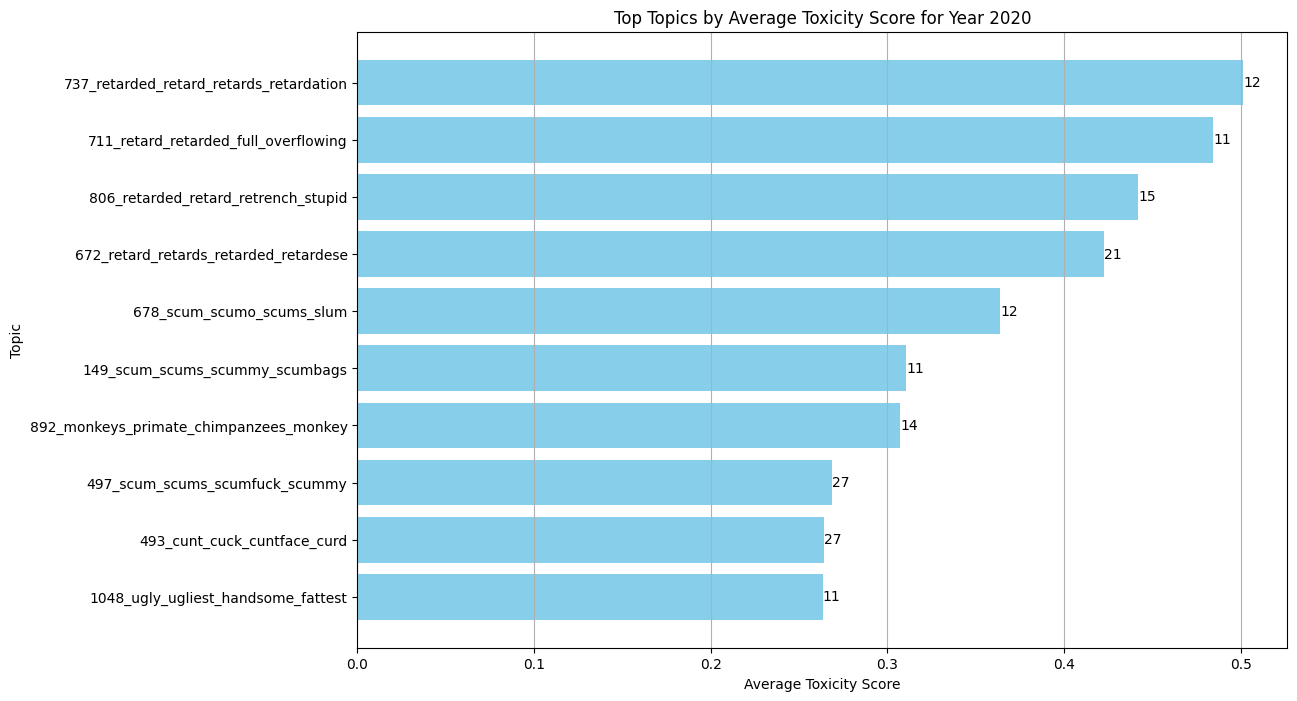

In [ ]:
# Year 2020
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_topics_2020['Name'], top_topics_2020['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score for Year 2020')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(top_topics_2020['average_toxicity_score']):
    plt.text(value, index, str(top_topics_2020['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

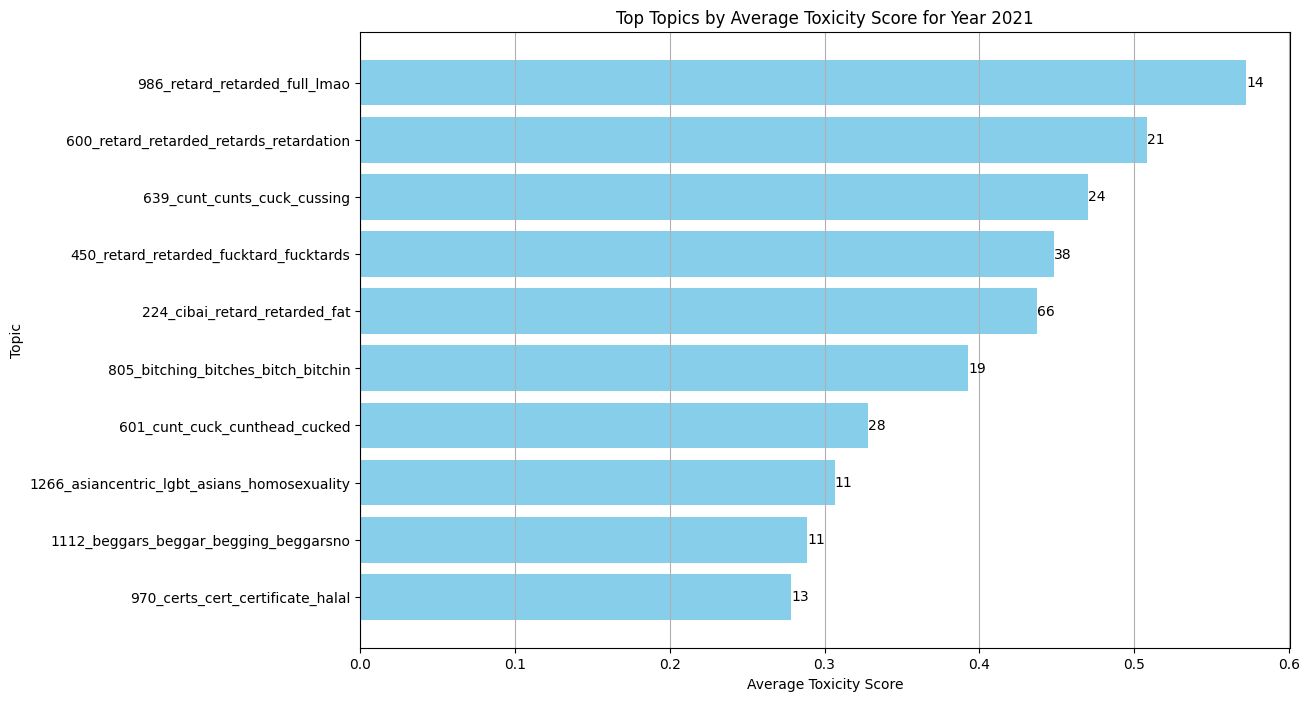

In [ ]:
# Year 2021
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_topics_2021['Name'], top_topics_2021['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score for Year 2021')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(top_topics_2021['average_toxicity_score']):
    plt.text(value, index, str(top_topics_2021['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

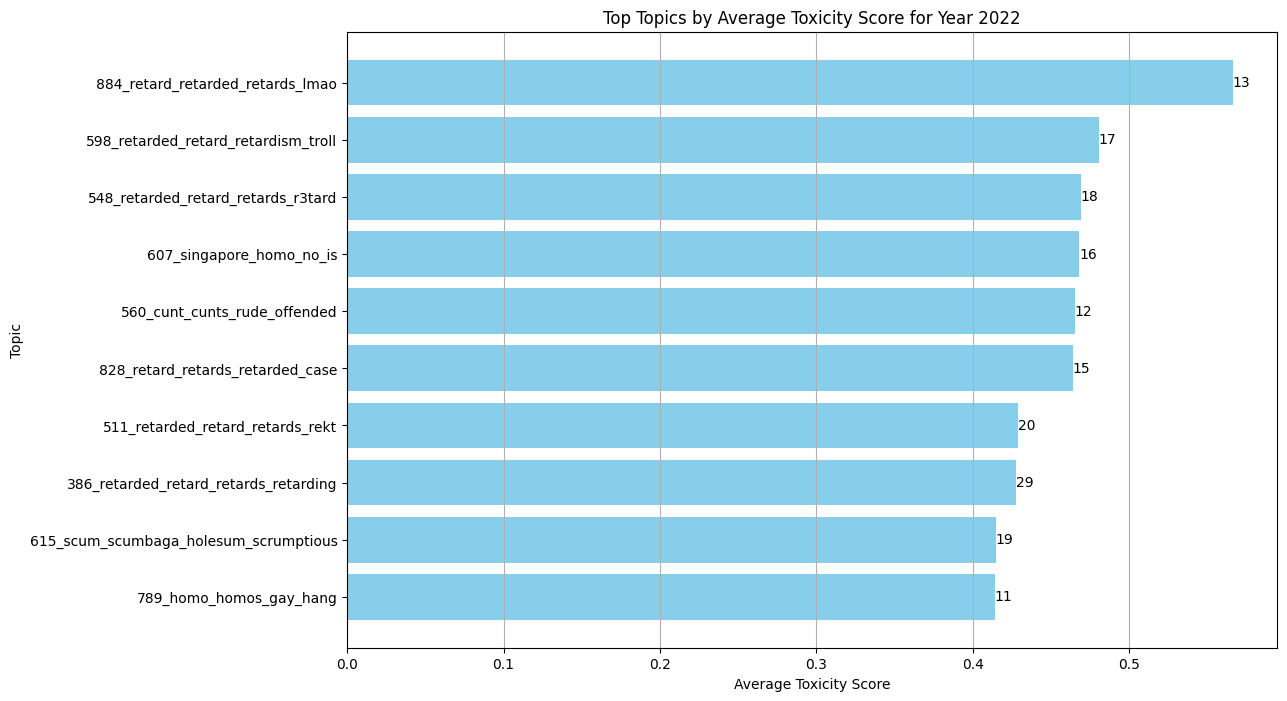

In [ ]:
# Year 2022
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_topics_2022['Name'], top_topics_2022['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score for Year 2022')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(top_topics_2022['average_toxicity_score']):
    plt.text(value, index, str(top_topics_2022['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

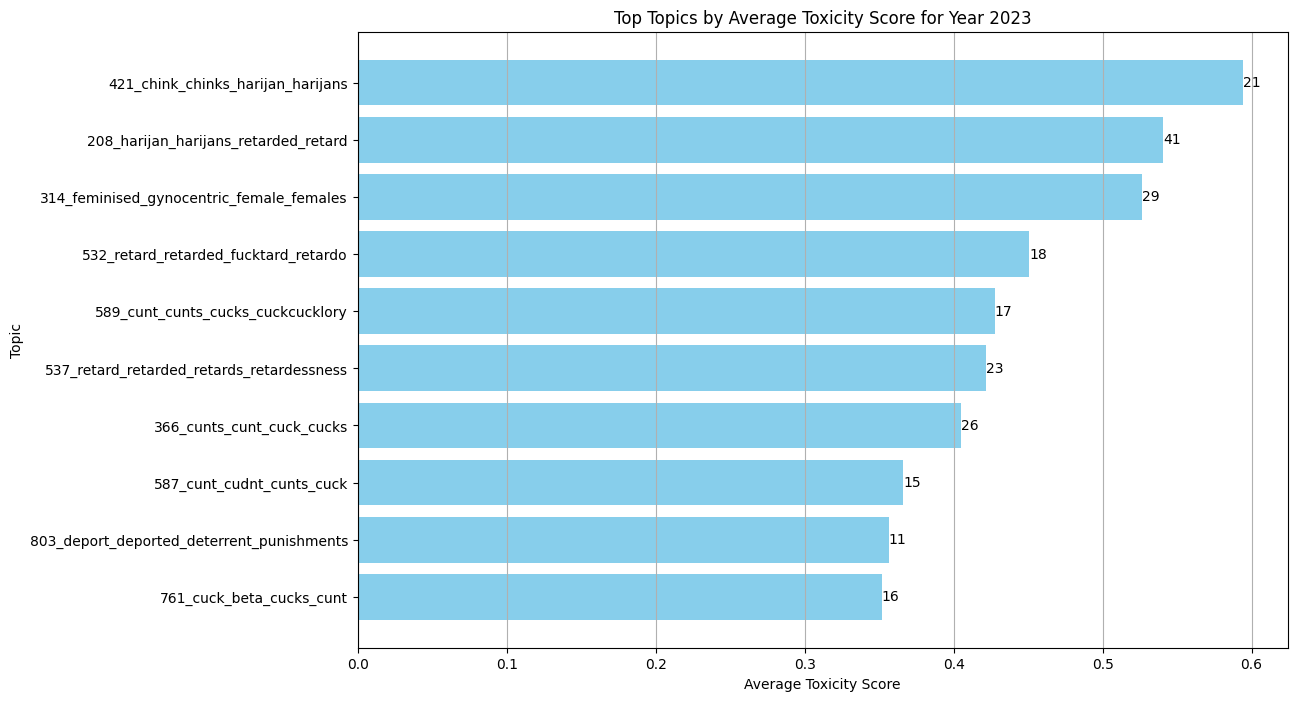

In [ ]:
# Year 2023
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_topics_2023['Name'], top_topics_2023['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score for Year 2023')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(top_topics_2023['average_toxicity_score']):
    plt.text(value, index, str(top_topics_2023['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()